In [5]:
import numpy as np # linear algebra
import pandas as pd 
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

path = ""
database = path + 'database.sqlite'
con = sqlite3.connect(database)

In [6]:
# import tables
player_table = pd.read_sql_query("SELECT * FROM Player", con)
player_table = pd.read_sql_query("SELECT * FROM Player", con)
player_att_table = pd.read_sql_query("SELECT * FROM Player_Attributes", con)
match_table = pd.read_sql_query("SELECT * FROM Match", con)
league_table = pd.read_sql_query("SELECT * FROM League", con)
country_table = pd.read_sql_query("SELECT * FROM Country", con)
team_table = pd.read_sql_query("SELECT * FROM Team", con)
team_att_table = pd.read_sql_query("SELECT * FROM Team_Attributes", con)


In [12]:
###################################################################
#  First part anaylse tables information individually             #
###################################################################
#analyse country table
print("Dimension of Country table: {}".format(country_table.shape))
print(100*"*")
print(country_table.info())
print(100*"*")
print(country_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(country_table.describe())
print(100*"*")
print(country_table.isnull().sum(axis=0))
print(100*"*")
print("Table:")
country_table

Dimension of Country table: (11, 2)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes
None
****************************************************************************************************
               name
count            11
unique           11
top     Switzerland
freq              1
****************************************************************************************************
                 id
count     11.000000
mean   12452.090909
std     8215.308472
min        1.000000
25%     6289.000000
50%    13274.000000
75%    18668.000000
max    24558.000000
***************************************************************************

id         name
0       1      Belgium
1    1729      England
2    4769       France
3    7809      Germany
4   10257        Italy
5   13274  Netherlands
6   15722       Poland
7   17642     Portugal
8   19694     Scotland
9   21518        Spain
10  24558  Switzerland

In [16]:
#analyse the league table
print("Dimension of League Table is: {}".format(league_table.shape))
print(100*"*")
print(league_table.info())
print(100*"*")
print(league_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(league_table.describe())
print(100*"*")
print(league_table.isnull().sum(axis=0))
print(100*"*")
print("Table:")
league_table


Dimension of League Table is: (11, 3)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes
None
****************************************************************************************************
                      name
count                   11
unique                  11
top     Poland Ekstraklasa
freq                     1
****************************************************************************************************
                 id    country_id
count     11.000000     11.000000
mean   12452.090909  12452.090909
std     8215.308472   8215.308472
min        1.000000      1

id  country_id                      name
0       1           1    Belgium Jupiler League
1    1729        1729    England Premier League
2    4769        4769            France Ligue 1
3    7809        7809     Germany 1. Bundesliga
4   10257       10257             Italy Serie A
5   13274       13274    Netherlands Eredivisie
6   15722       15722        Poland Ekstraklasa
7   17642       17642  Portugal Liga ZON Sagres
8   19694       19694   Scotland Premier League
9   21518       21518           Spain LIGA BBVA
10  24558       24558  Switzerland Super League

Dimension of Player Table is: (11060, 7)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB
None
****************************************************************************************************
       player_name             birthday
count        11060                11060
unique       10848                 5762
top         Danilo 

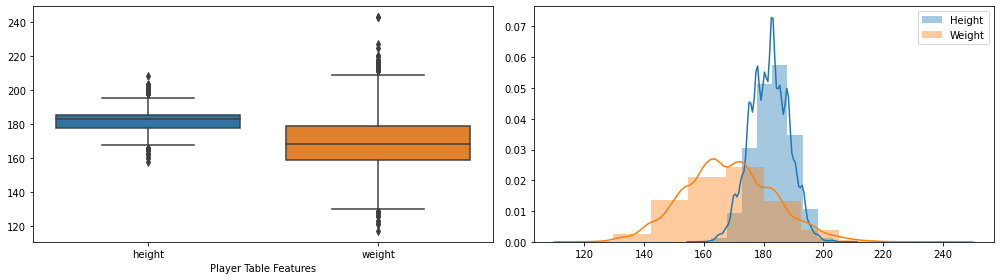

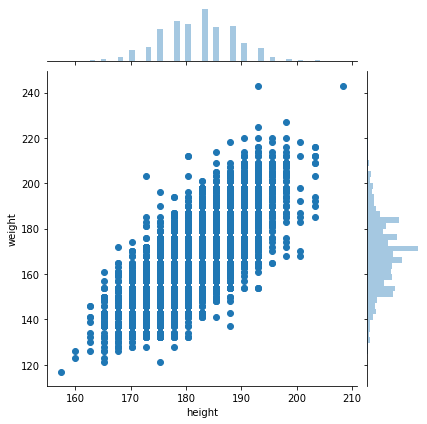

In [17]:
#analyse player
print("Dimension of Player Table is: {}".format(player_table.shape))
print(100*"*")
print(player_table.info())
print(100*"*")
print(player_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(player_table.describe())
print(100*"*")
print(player_table.isnull().sum(axis=0))
print(100*"*")
##
fig1, ax1 = plt.subplots(nrows = 1, ncols = 2)
fig1.set_size_inches(14,4)
sns.boxplot(data = player_table.loc[:,["height",'weight']], ax = ax1[0])
ax1[0].set_xlabel('Player Table Features')
ax1[0].set_ylabel('')
sns.distplot(a = player_table.loc[:,["height"]], bins= 10, kde = True, ax = ax1[1], \
            label = 'Height')
sns.distplot(a = player_table.loc[:,["weight"]], bins= 10, kde = True, ax = ax1[1], \
            label = 'Weight')
ax1[1].legend()
sns.jointplot(x='height',y = 'weight',data = player_table,kind = 'scatter')
fig1.tight_layout()
print("Cardinality of Feature: Height - {:0.3f}%".format( \
        100 * (len(np.unique(player_table.loc[:,'height'])) / len(player_table.loc[:,'height']))))
print("Cardinality of Feature: Weight - {:0.3f}%".format( \
        100 * (len(np.unique(player_table.loc[:,'weight'])) / len(player_table.loc[:,'weight']))))
#Very low cardinality for continuous variable for both the weight and height 
#features considering we have 11060 instances. As expected instances from both 
#the weight and height features follow a normal distribution and follow a linear relationship.
print(100*"*")



In [18]:
#analyze player attribute table

print("Dimension of Player Attributes Table is: {}".format(player_att_table.shape))
print(100*"*")
print(player_att_table.info())
print(100*"*")
print(player_att_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(player_att_table.describe())
print(100*"*")
print(player_att_table.isnull().sum(axis=0))
#Player Attributes Table has some missing data

Dimension of Player Attributes Table is: (183978, 42)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing  

In [19]:
# just to see player attributes
player_att_table.select_dtypes(include =['float64','int64']).head().\
loc[:,player_att_table.select_dtypes(include =['float64','int64']).columns[3:]].head()

overall_rating  potential  crossing  finishing  heading_accuracy  \
0            67.0       71.0      49.0       44.0              71.0   
1            67.0       71.0      49.0       44.0              71.0   
2            62.0       66.0      49.0       44.0              71.0   
3            61.0       65.0      48.0       43.0              70.0   
4            61.0       65.0      48.0       43.0              70.0   

   short_passing  volleys  dribbling  curve  free_kick_accuracy  long_passing  \
0           61.0     44.0       51.0   45.0                39.0          64.0   
1           61.0     44.0       51.0   45.0                39.0          64.0   
2           61.0     44.0       51.0   45.0                39.0          64.0   
3           60.0     43.0       50.0   44.0                38.0          63.0   
4           60.0     43.0       50.0   44.0                38.0          63.0   

   ball_control  acceleration  sprint_speed  agility  reactions  balance  \
0          49.0          60.0          64.0     59.0       47.0     65.0   
1          49.0          60.0          64.0     59.0       47.0     65.0   
2          49.0          60.0          64.0     59.0       47.0     65.0   
3          48.0          60.0          64.0     59.0       46.0     65.0   
4          48.0          60.0          64.0     59.0       46.0     65.0   

   shot_power  jumping  stamina  strength  long_shots  aggression  \
0        55.0     58.0     54.0      76.0        35.0        71.0   
1        55.0     58.0     54.0      76.0        35.0        71.0   
2        55.0     58.0     54.0      76.0        35.0        63.0   
3        54.0     58.0     54.0      76.0        34.0        62.0   
4        54.0     58.0     54.0      76.0        34.0        62.0   

   interceptions  positioning  vision  penalties  marking  standing_tackle  \
0           70.0         45.0    54.0       48.0     65.0             69.0   
1           70.0         45.0    54.0       48.0     65.0             69.0   
2           41.0         45.0    54.0       48.0     65.0             66.0   
3           40.0         44.0    53.0       47.0     62.0             63.0   
4           40.0         44.0    53.0       47.0     62.0             63.0   

   sliding_tackle  gk_diving  gk_handling  gk_kicking  gk_positioning  \
0            69.0        6.0         11.0        10.0             8.0   
1            69.0        6.0         11.0        10.0             8.0   
2            69.0        6.0         11.0        10.0             8.0   
3            66.0        5.0         10.0         9.0             7.0   
4            66.0        5.0         10.0         9.0             7.0   

   gk_reflexes  
0          8.0  
1          8.0  
2          8.0  
3          7.0  
4          7.0

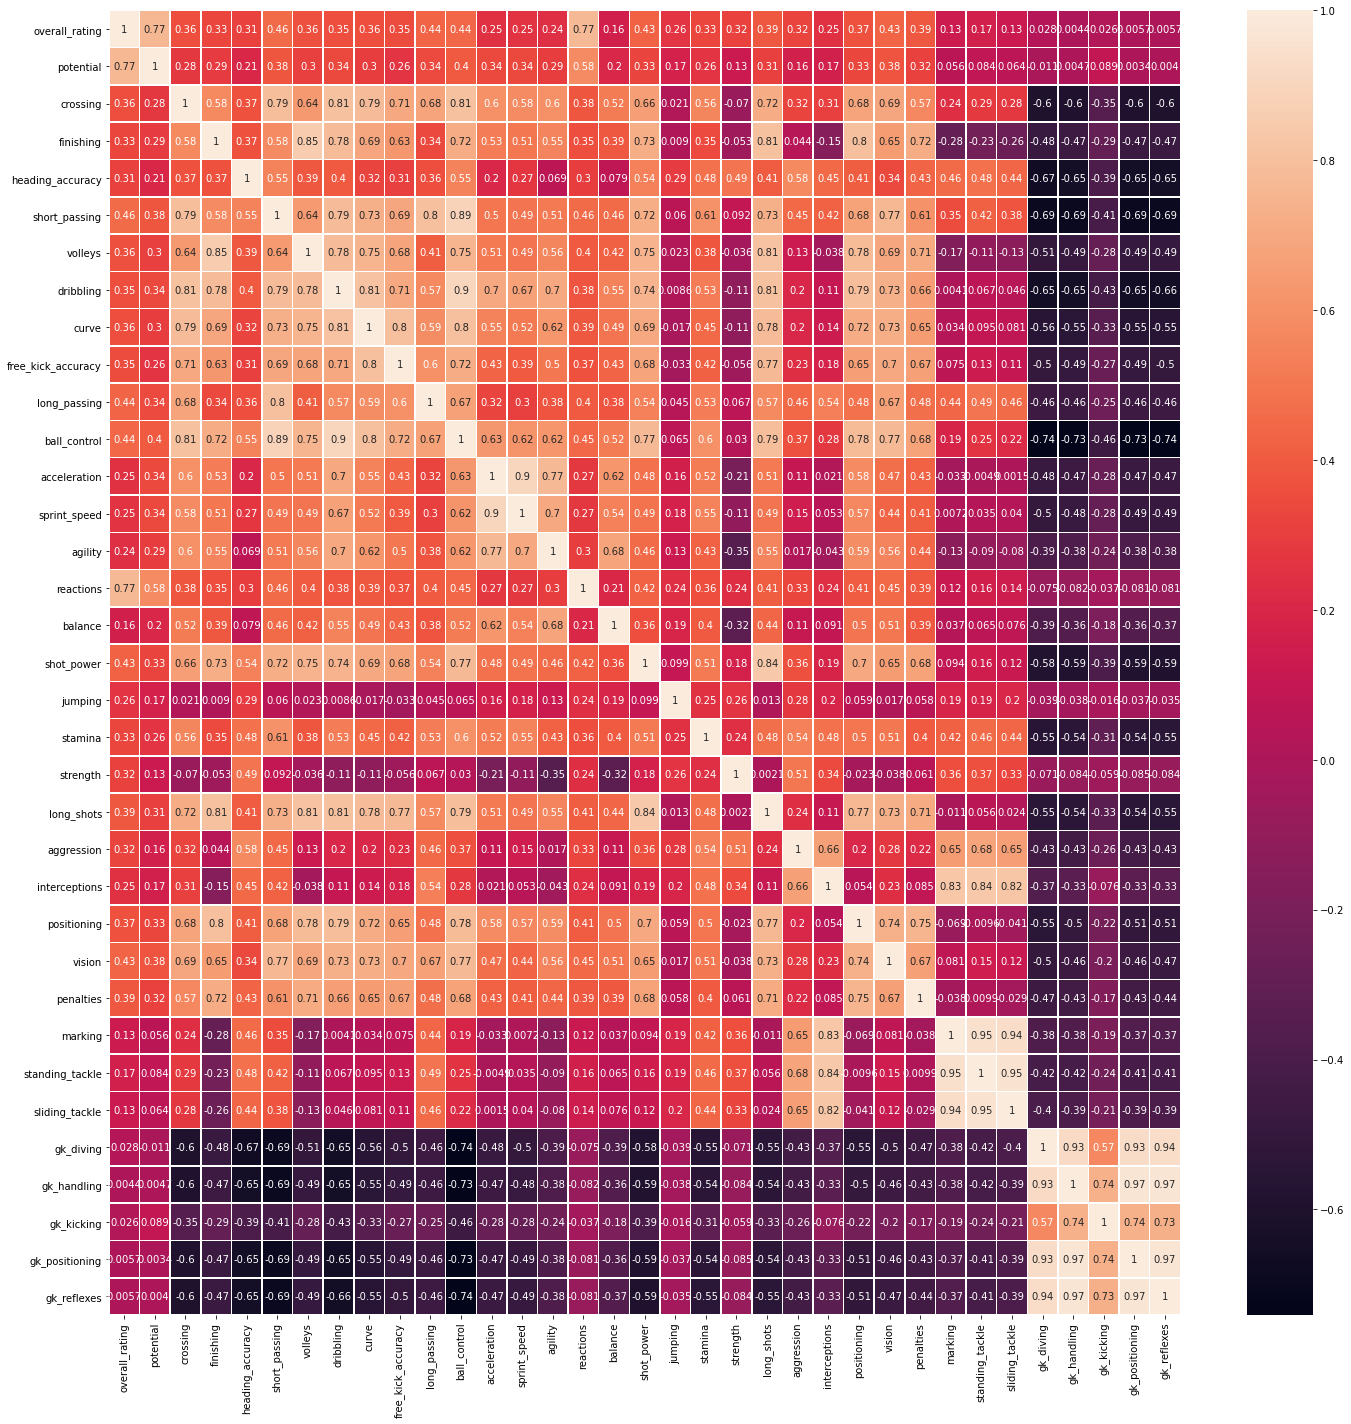

In [20]:
#analyse correlation between attributes \oWo/ sugoi
# curisosament o overral rating esta mais relacionado com as features : potencial e reactions
# os atributos que parecem estar mais coorrelacionados sao relativos as features de goalkeepers (excepto gk kicking)
corr2 = player_att_table.select_dtypes(include =['float64','int64']).\
loc[:,player_att_table.select_dtypes(include =['float64','int64']).columns[3:]].corr()
fig2,ax2 = plt.subplots(nrows = 1,ncols = 1)
fig2.set_size_inches(w=24,h=24)
sns.heatmap(corr2,annot = True,linewidths=0.5,ax = ax2)

In [177]:
# lets try to cluster stuff 
# a quite good cluster happens to be: 
#Forward : Finishing, Volleys, Shot_Power
#Mid-fielder : Short_Passing, Vision
#Defender : Standing_Tackle, Sliding_Tackle
#Goalkeeper : GK_handling, GK_positioning, GK_reflexes
# foi feita nao pesada de cada atributo
from sklearn.cluster import KMeans

player_att_table.dropna(inplace=True)
player_att = player_att_table.drop_duplicates(subset='player_api_id')
player_att_table = player_att_table.drop_duplicates(subset='player_api_id')


model = KMeans(n_clusters=5)
model.fit(player_att[['overall_rating','potential']])
predict = pd.DataFrame(model.predict(player_att[['overall_rating','potential']]))

predict.columns=['predict']
plt.figure(figsize=(8,7))
plt.scatter(x=player_att.overall_rating,y=player_att.potential,c=predict.predict)
plt.title("Clustering Using Overall Ratings and Potential Scores",fontdict={'fontsize':15})
plt.ylabel("Potential")
plt.xlabel("Overall_Rating")
 # sugoi it fits well

Text(0.5, 0, 'Overall_Rating')

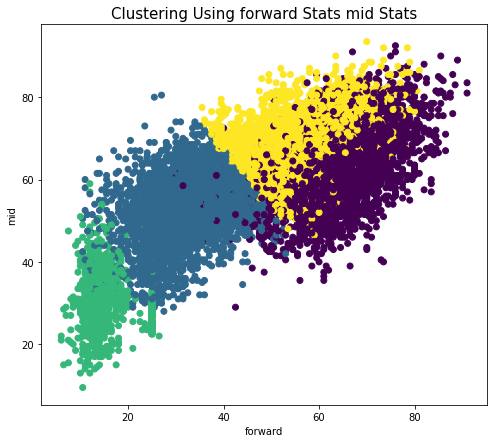

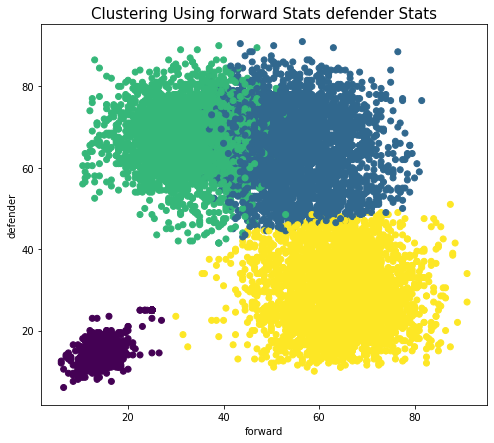

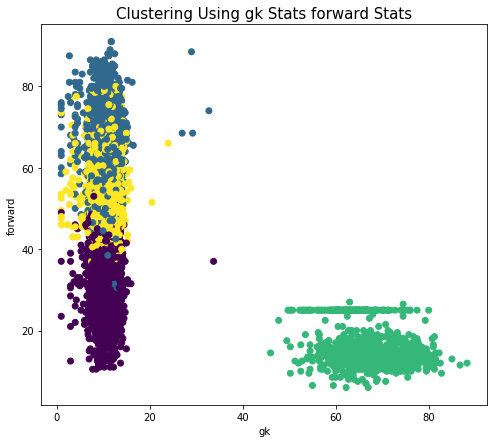

In [178]:
# try to aggregate some features

forward_features = ['finishing','volleys']
mid_features = ['short_passing','vision']
defender_features = ['standing_tackle','sliding_tackle']
gk_features = ['gk_diving','gk_handling','gk_kicking','gk_positioning']

# media nao pesada das features
# e suposto dar para um cluster good (diminuicao de dimensoes)
player_att_table['forward'] = (player_att[forward_features].iloc[:,0] + player_att[forward_features].iloc[:,1])/2
player_att_table['mid'] = (player_att[mid_features].iloc[:,0] + player_att[mid_features].iloc[:,1])/2
player_att_table['defender'] = (player_att[defender_features].iloc[:,0] + player_att[defender_features].iloc[:,1])/2
player_att_table['gk'] = (player_att[gk_features].iloc[:,0] + player_att[gk_features].iloc[:,1] +
                   player_att[gk_features].iloc[:,2]+player_att[gk_features].iloc[:,3])/4

def cluster_position(pos1,pos2):
    model = KMeans(n_clusters=4)
    model.fit(player_att_table[['forward','mid','defender','gk']])
    predict = pd.DataFrame(model.predict(player_att_table[['forward','mid','defender','gk']]))
    predict.columns=['predict']
    plt.figure(figsize=(8,7))
    plt.scatter(x=player_att_table[str(pos1)],y=player_att_table[str(pos2)],c=predict.predict,marker='o')
    plt.title("Clustering Using "+pos1+" Stats "+pos2+" Stats",fontdict={'fontsize':15})
    plt.ylabel(pos2)
    plt.xlabel(pos1)

cluster_position('forward','mid')
cluster_position('mid','defender')
cluster_position('forward','defender')
cluster_position('gk','forward')

## it happens to be quite good


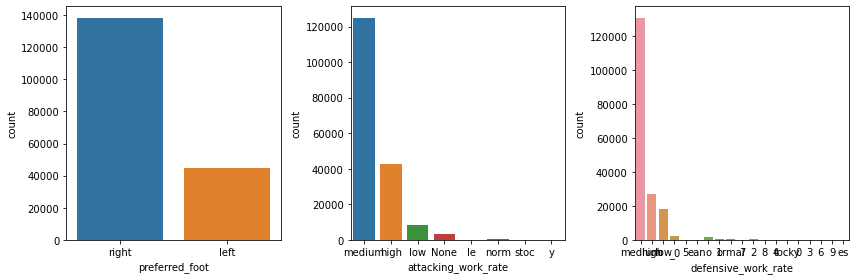

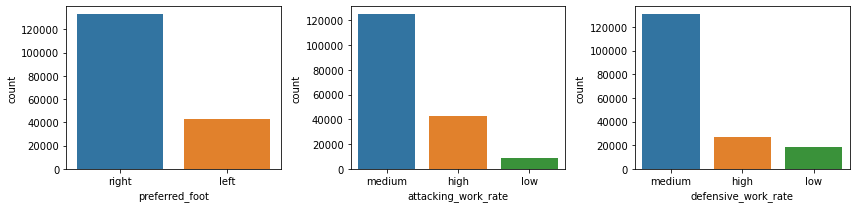

In [21]:
# analyse feature prefered foot, attcaking work rate and defensive work rate

fig3, ax3 = plt.subplots(nrows = 1, ncols = 3)
fig3.set_size_inches(12,4)
sns.countplot(x = player_att_table['preferred_foot'],ax = ax3[0])
sns.countplot(x = player_att_table['attacking_work_rate'],ax = ax3[1])
sns.countplot(x = player_att_table['defensive_work_rate'],ax = ax3[2])
fig3.tight_layout()
##attacking work rate and defense work rate has strange columns, we are going to remove it
#need to remove thos columns
player_att_table_updated1 = player_att_table.loc[(player_att_table['attacking_work_rate'].\
                                                  isin(['medium','high','low'])\
                       & player_att_table['defensive_work_rate'].isin(['medium','high','low'])),:]
#after tables
fig4, ax4 = plt.subplots(nrows = 1, ncols = 3)
fig4.set_size_inches(12,3)
sns.countplot(x = player_att_table_updated1['preferred_foot'],ax = ax4[0])
sns.countplot(x = player_att_table_updated1['attacking_work_rate'],ax = ax4[1])
sns.countplot(x = player_att_table_updated1['defensive_work_rate'],ax = ax4[2])
fig4.tight_layout()
# a maioria de work rate em  ambos os casos é maioritario, em ambos superior a 70%
# cerca de 4.2% das rows removidas por serem invalidas


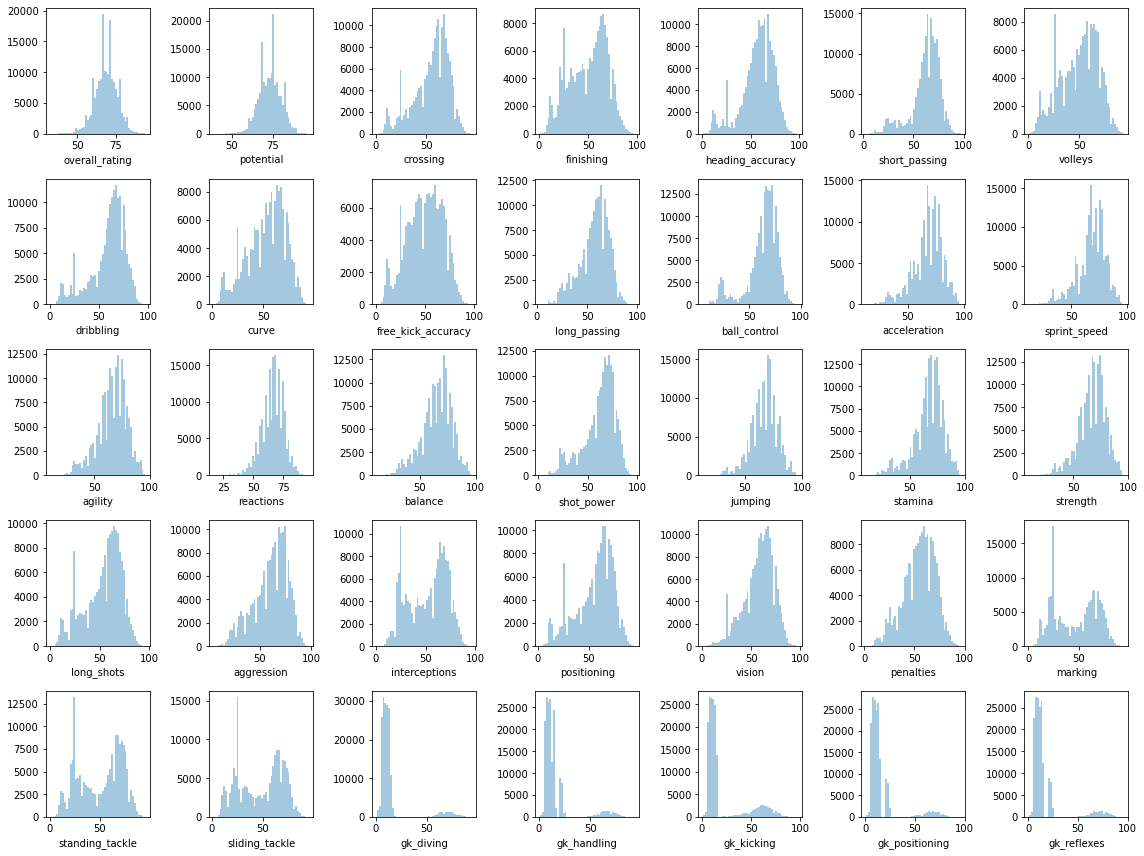

In [49]:
# which features should we really use in a table with that much features ??

pat = player_att_table_updated1.loc[:,player_att_table_updated1.columns.tolist()[3:]]
fig5, ax5 = plt.subplots(nrows=5,ncols=7)
fig5.set_size_inches(16,12)
for i,j in enumerate(player_att_table_updated1.select_dtypes(include = ['float64','int64']).columns[3:].tolist()):
    sns.distplot(pat.loc[:,j],kde = False,hist = True, ax = ax5[int(i/7)][i%7])
fig5.tight_layout()

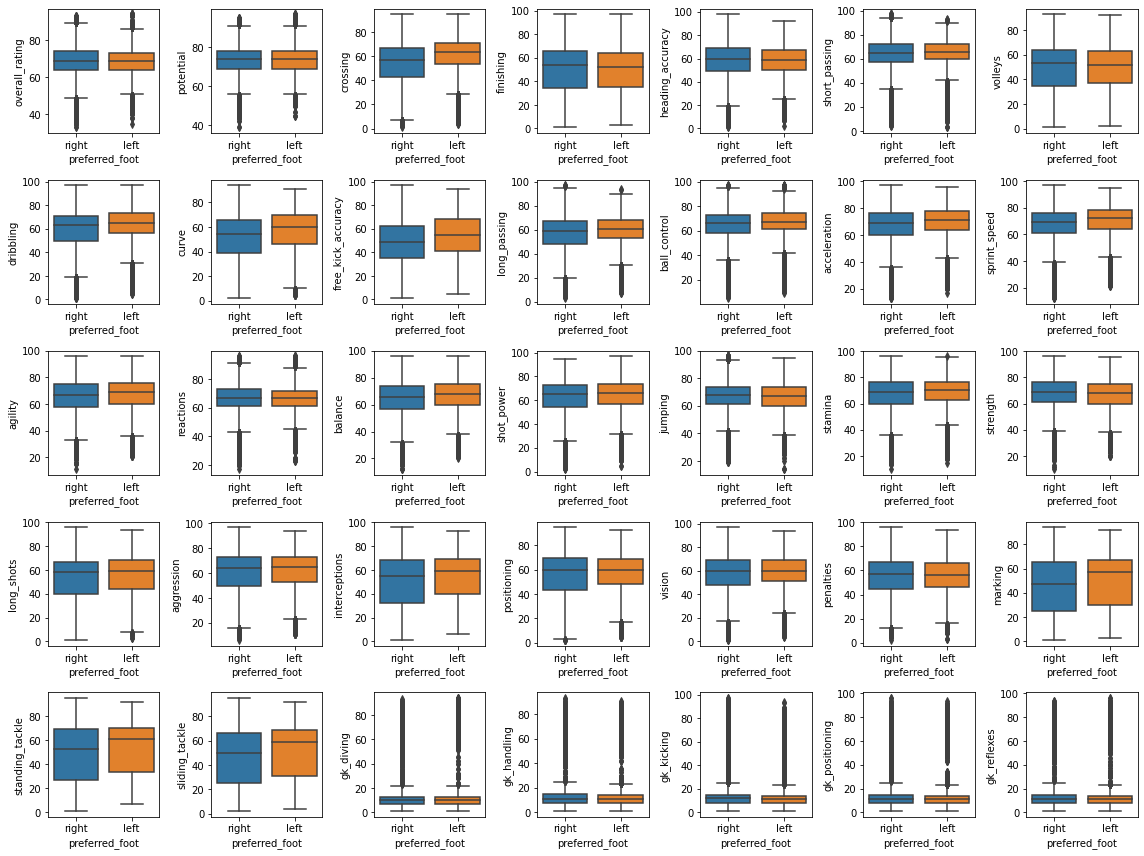

In [23]:
## check the relation between the foot and the features
fig6, ax6 = plt.subplots(nrows=5,ncols=7)
fig6.set_size_inches(16,12)
for i,j in enumerate(player_att_table_updated1.select_dtypes(include = ['float64','int64']).columns[3:].tolist()):
    sns.boxplot(x = "preferred_foot", y = j, data= pat, ax = ax6[int(i/7)][i%7])
fig6.tight_layout()
# conclusion : foot does not distinguish any of the variables.

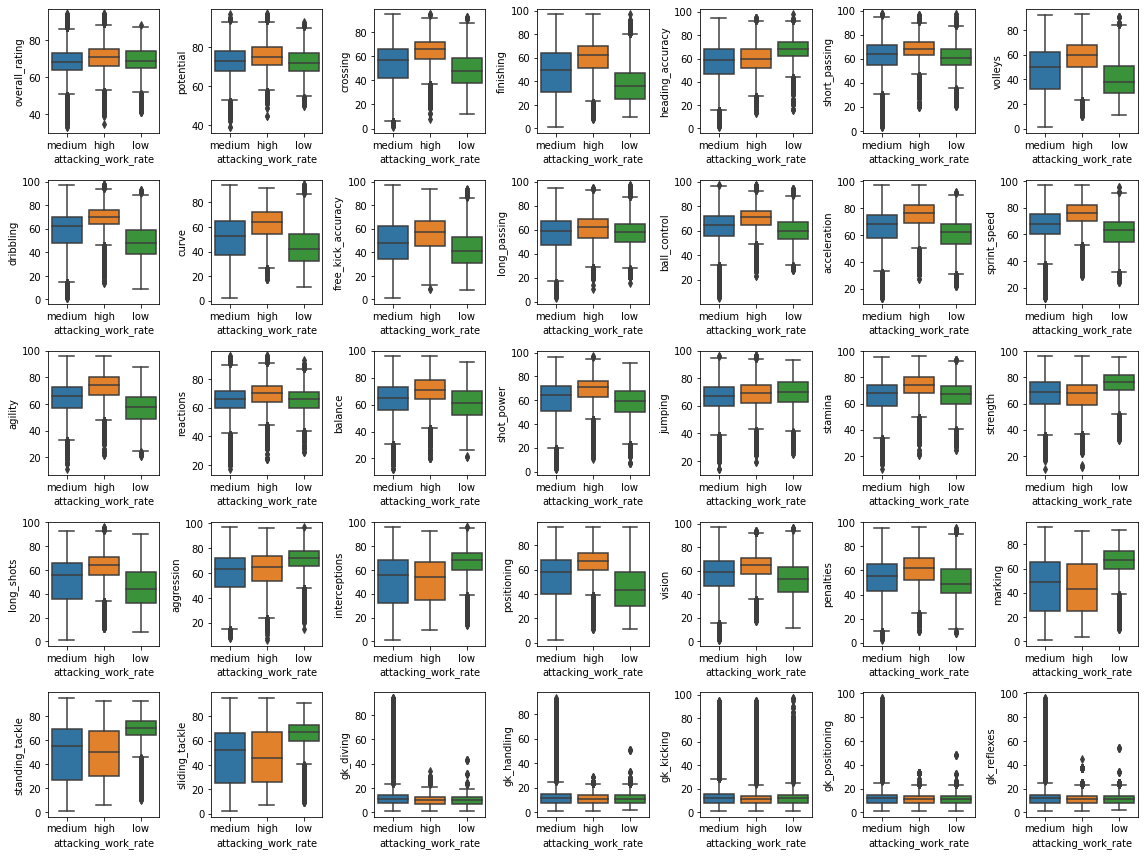

In [24]:
## relation between the attacking rate and the features
fig7, ax7 = plt.subplots(nrows=5,ncols=7)
fig7.set_size_inches(16,12)
for i,j in enumerate(player_att_table_updated1.select_dtypes(include = ['float64','int64']).columns[3:].tolist()):
    sns.boxplot(x = "attacking_work_rate", y = j, data= pat, ax = ax7[int(i/7)][i%7])
fig7.tight_layout() 

In [68]:
player_att_table_updated1['date']


0         2016-02-18 00:00:00
1         2015-11-19 00:00:00
2         2015-09-21 00:00:00
3         2015-03-20 00:00:00
4         2007-02-22 00:00:00
                 ...         
183973    2009-08-30 00:00:00
183974    2009-02-22 00:00:00
183975    2008-08-30 00:00:00
183976    2007-08-30 00:00:00
183977    2007-02-22 00:00:00
Name: date, Length: 176161, dtype: object

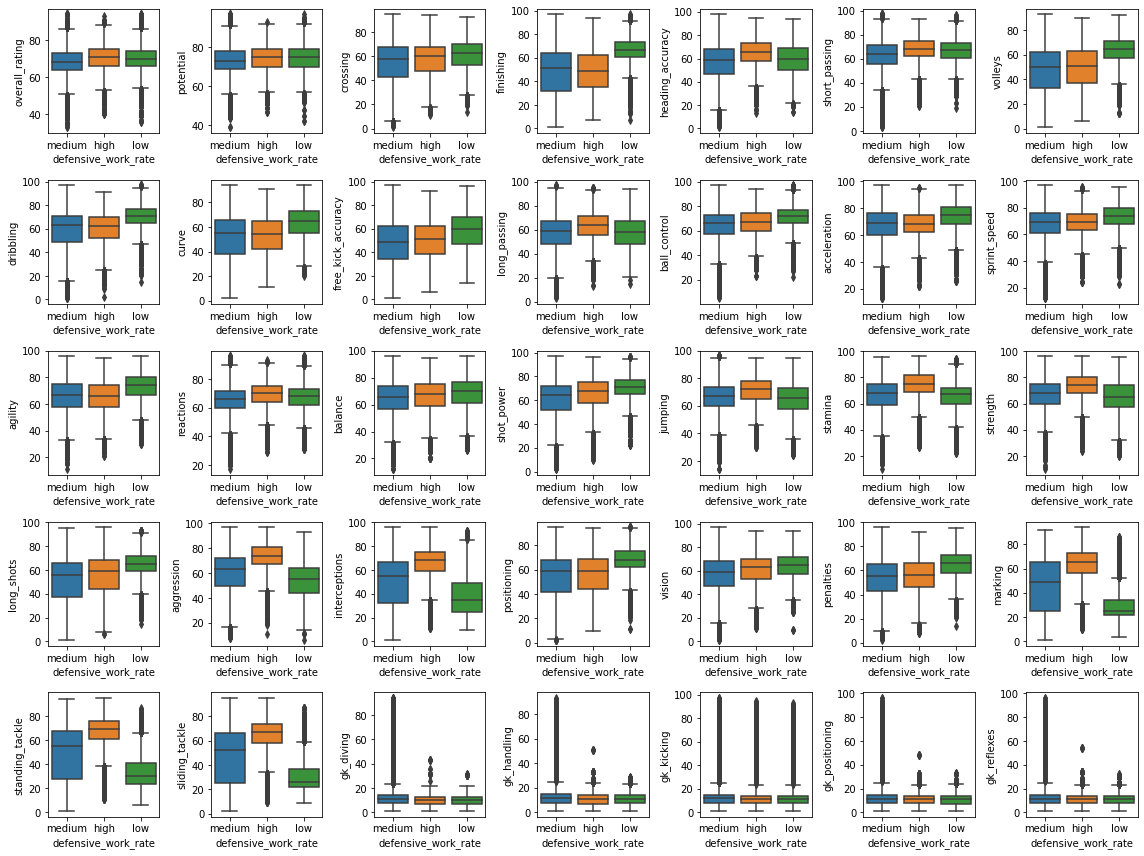

In [28]:
## relation between the defensive rate and the features
fig8, ax8 = plt.subplots(nrows=5,ncols=7)
fig8.set_size_inches(16,12)
for i,j in enumerate(player_att_table_updated1.select_dtypes(include = ['float64','int64']).columns[3:].tolist()):
    sns.boxplot(x = "defensive_work_rate", y = j, data= pat, ax = ax8[int(i/7)][i%7])
fig8.tight_layout()

In [ ]:
#Analyse team table
print("Dimension of Team Table is: {}".format(team_table.shape))
print(100*"*")
print(team_table.info())
print(100*"*")
print(team_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(team_table.describe())
print(100*"*")
print(team_table.isnull().sum(axis=0))


In [ ]:
# there are rows with null values in the team table
team_table_updated = team_table[~team_table.loc[:,'team_fifa_api_id'].isnull()]


In [ ]:
## Analyse team attribute tables
print("Dimension of Team Attributes Table is: {}".format(team_att_table.shape))
print(100*"*")
print(team_att_table.info())
print(100*"*")
print(team_att_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(team_att_table.describe())
print(100*"*")
print(team_att_table.isnull().sum(axis=0))

In [74]:
# manage row with null values
team_att_table_updated1 = team_att_table.drop(['buildUpPlayDribbling'],axis = 1)
print("Dimension of Team Attributes Table updated is: {}".format(team_att_table_updated1.shape))

Dimension of Team Attributes Table updated is: (1458, 24)


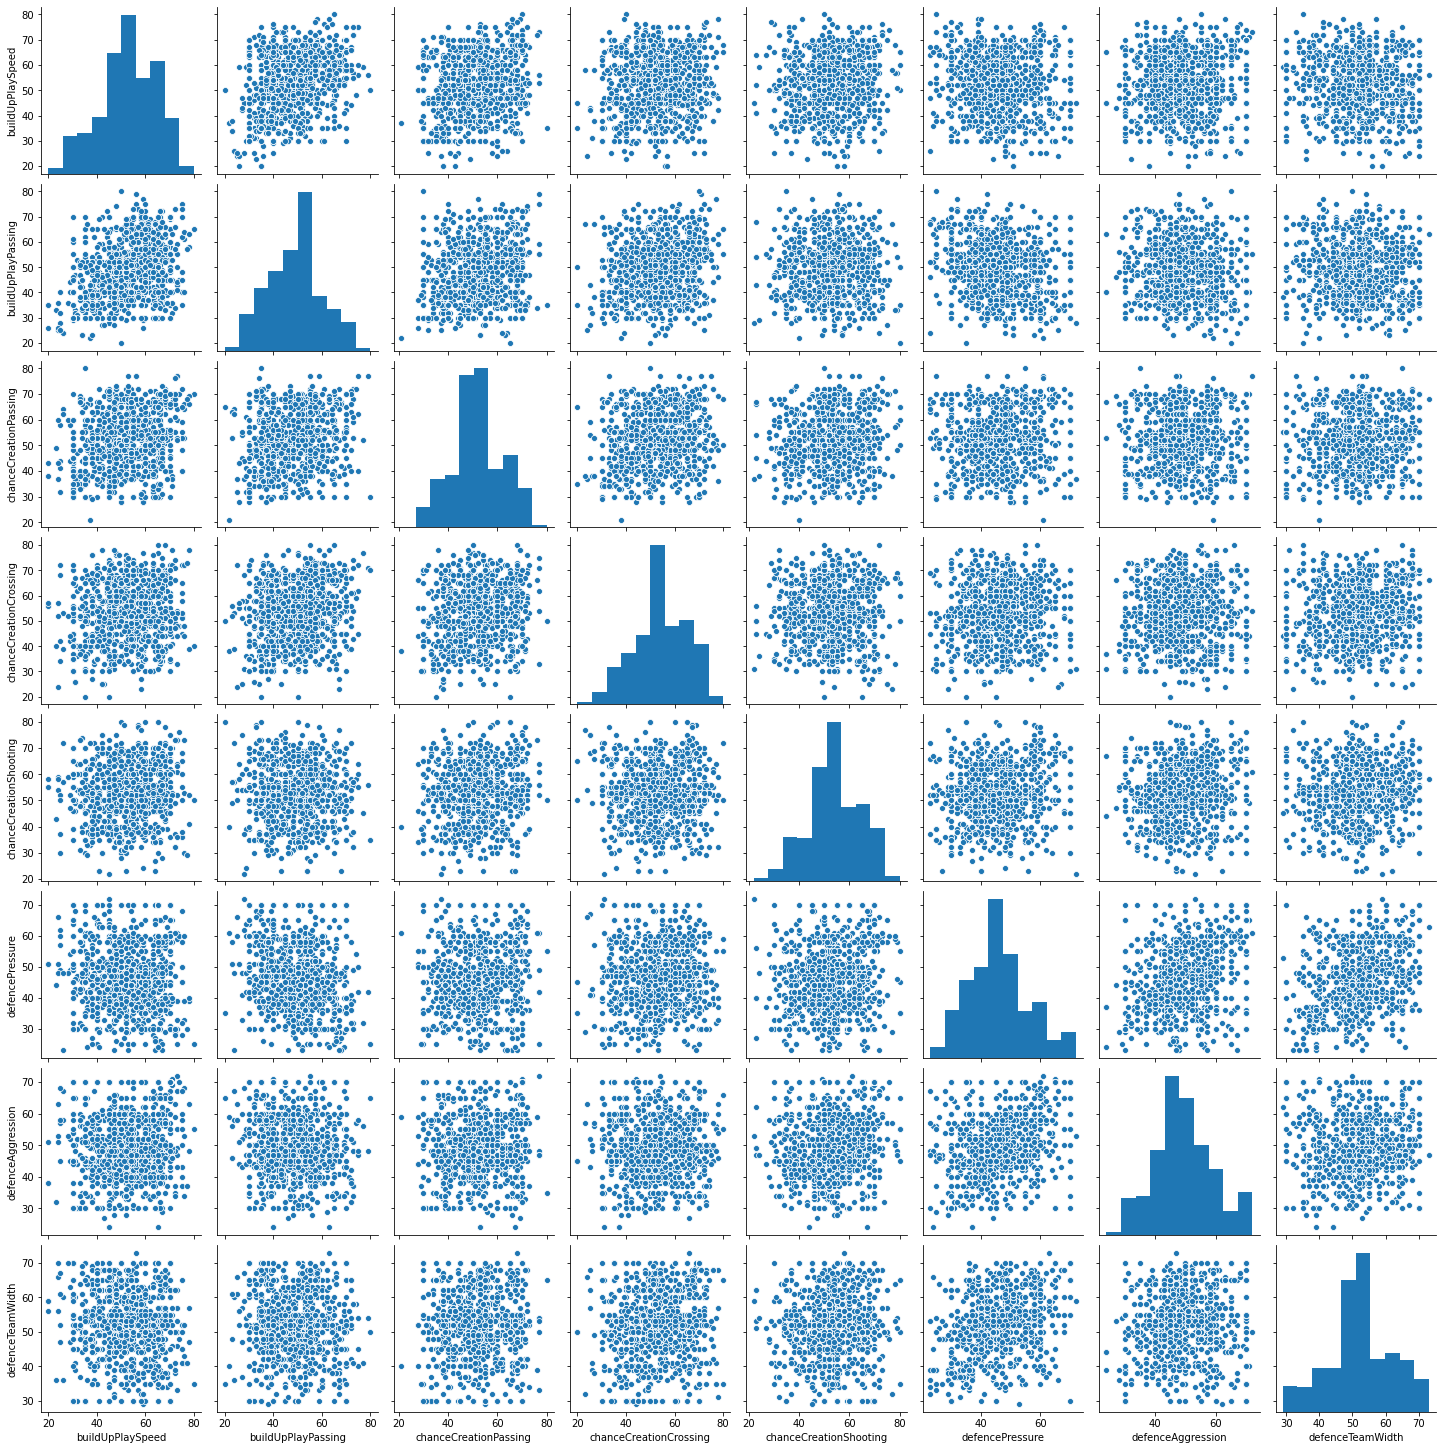

In [77]:
tat = team_att_table_updated1.loc[:,team_att_table_updated1.columns.tolist()[3:]]
sns.pairplot(tat)
# from what I see there is no correlation between attributes :(

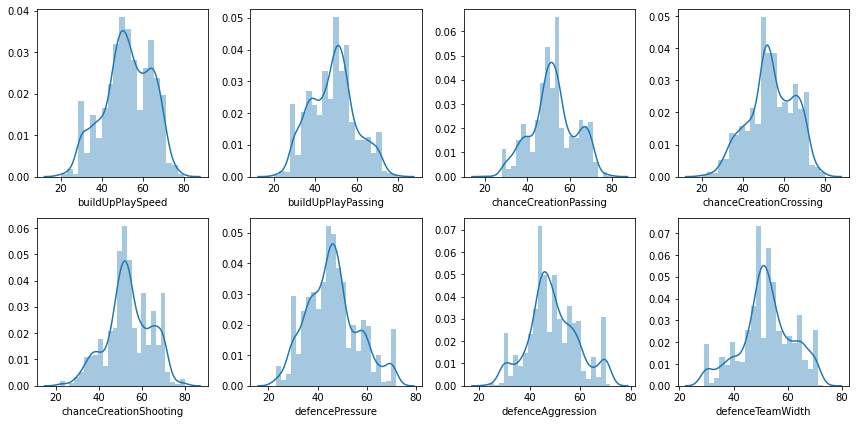

In [78]:
fig9, ax9 = plt.subplots(nrows=2,ncols=4)
fig9.set_size_inches(12,6)
for i,j in enumerate(team_att_table_updated1.select_dtypes(include = ['int64']).columns[3:].tolist()):
    sns.distplot(tat.loc[:,j],kde =True,hist = True, ax = ax9[int(i/4)][i%4])
fig9.tight_layout()
# none of the continuous features are normaly distributted or appear to follow exponential family distributions

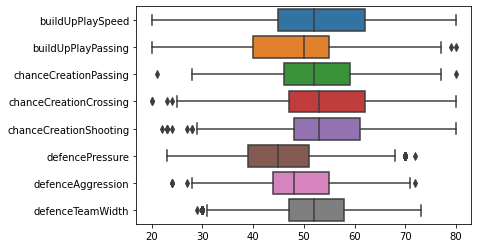

In [79]:
sns.boxplot(data = team_att_table_updated1.select_dtypes(include = ['int64']).iloc[:,3:],\
           orient = 'h')

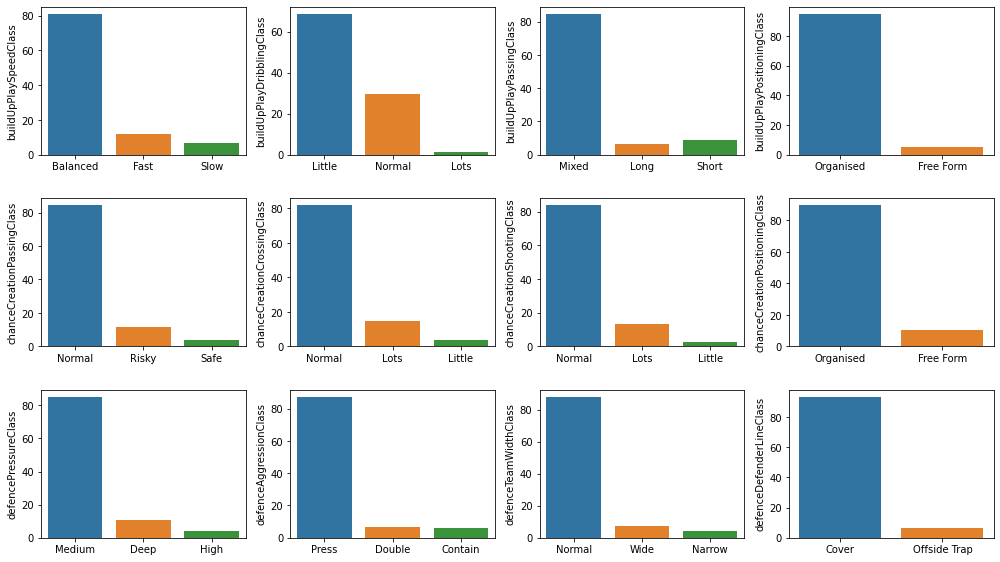

In [80]:
# we can make discrete values with it
fig9, ax9 = plt.subplots(nrows=3,ncols=4)
fig9.set_size_inches(14,8)
for i,j in enumerate(team_att_table_updated1.select_dtypes(include = ['object']).columns[1:].tolist()):
    #sns.countplot(tat.loc[:,j], ax = ax9[int(i/4)][i%4])
    sns.barplot(x = j, y = j, data = tat,\
            estimator = lambda x: len(x)/len(tat) * 100, ax = ax9[int(i/4)][i%4],\
           orient = 'v')
    ax9[int(i/4)][i%4].set(xlabel = "")
fig9.tight_layout()

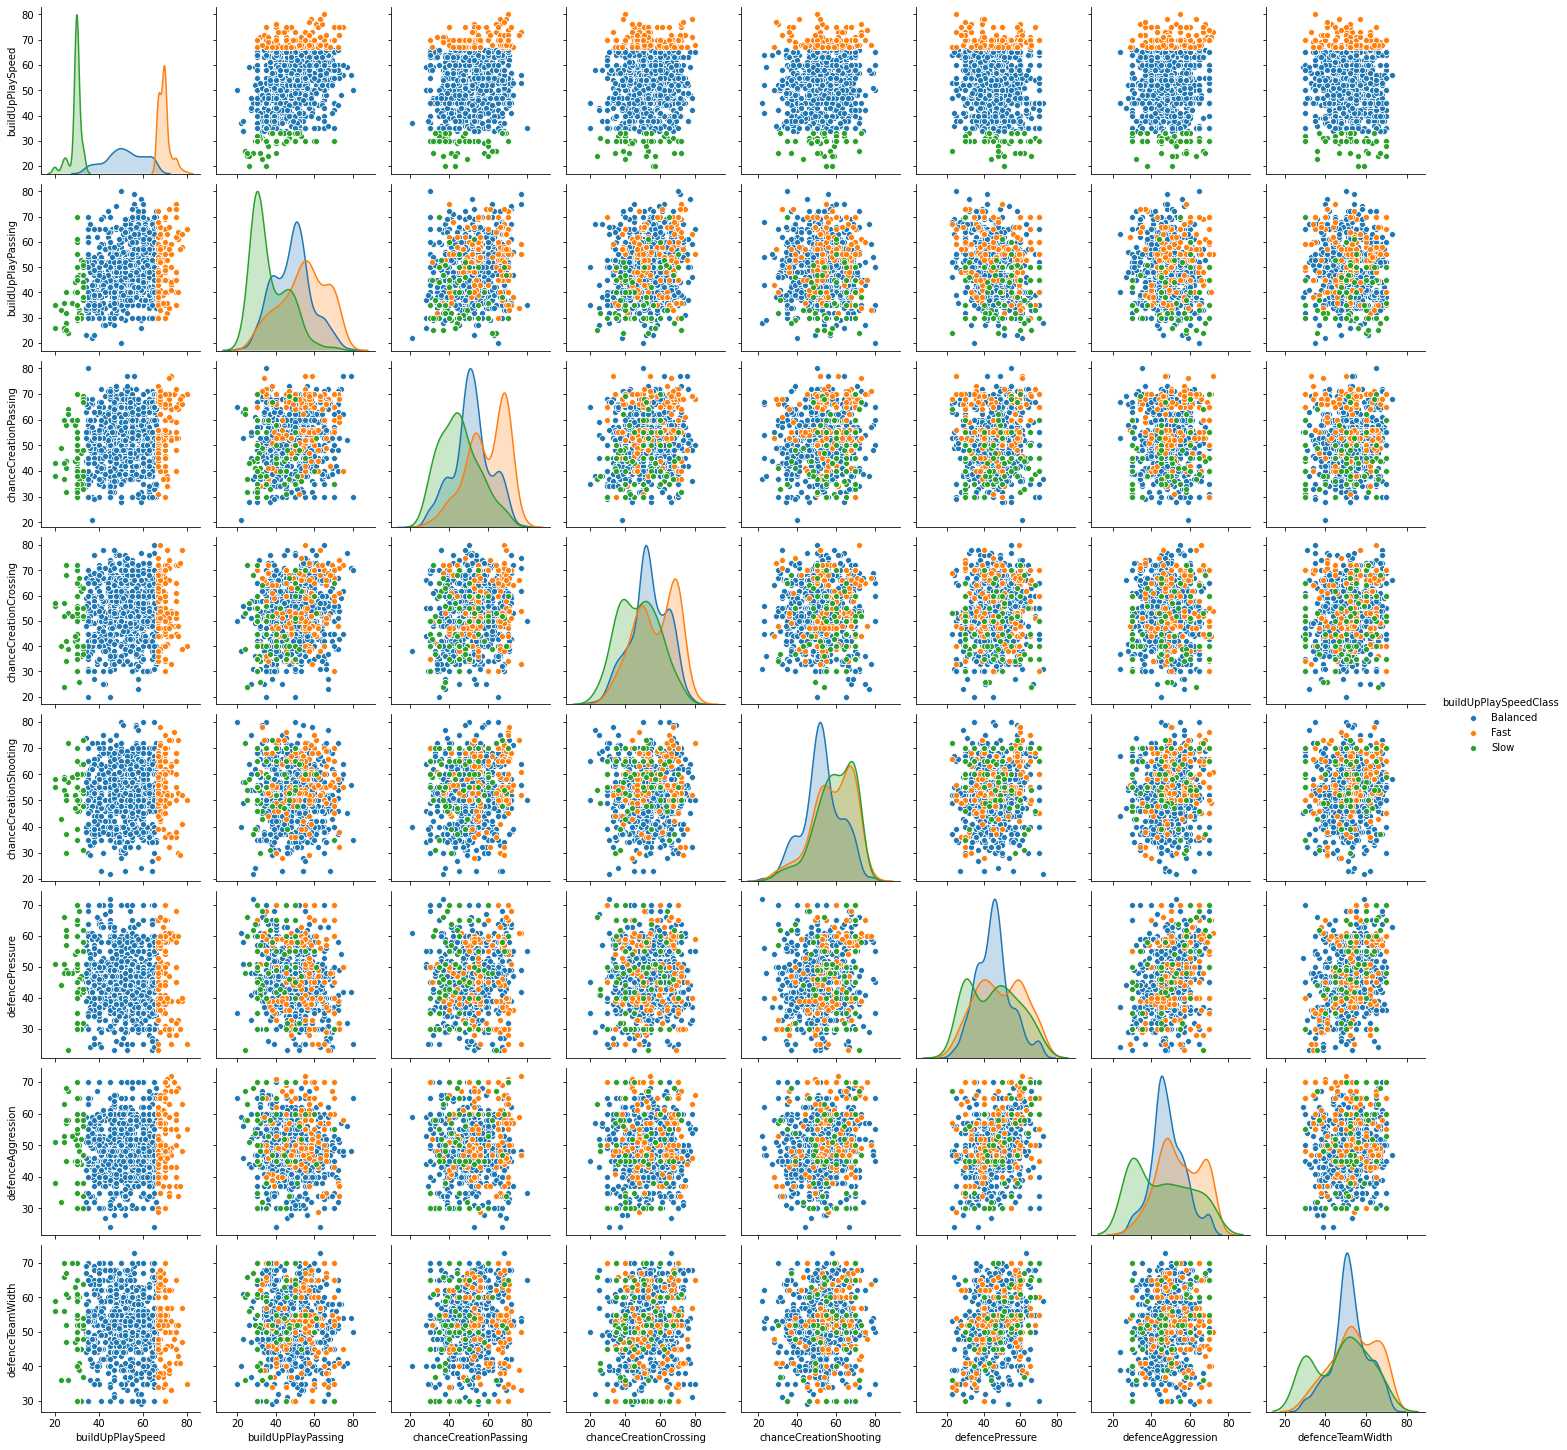

In [82]:
tat.select_dtypes(include = ['int64']).columns.tolist()
sns.pairplot(tat,hue = tat.select_dtypes(include = ['object']).\
          columns.tolist()[1]) 
#speed can be used to distinguish the plot in different sectinos

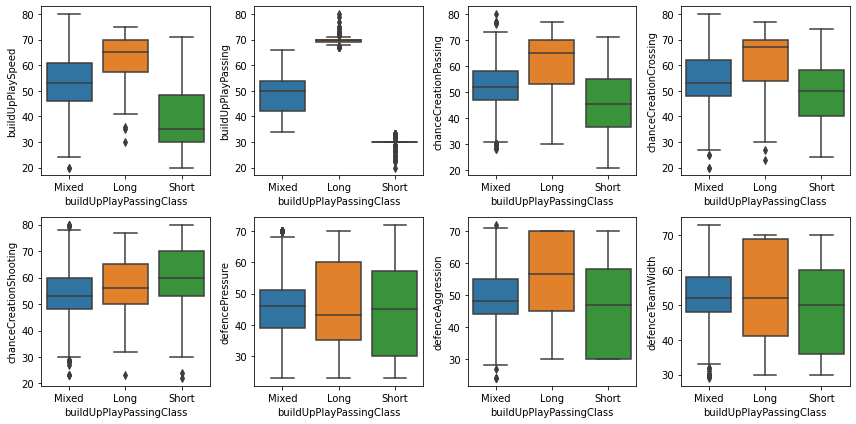

In [85]:
fig9, ax9 = plt.subplots(nrows=2,ncols=4)
fig9.set_size_inches(12,6)
for i,j in enumerate(team_att_table_updated1.select_dtypes(include = ['int64']).columns[3:].tolist()):
    sns.boxplot(data = tat, y = j, x = tat.select_dtypes(include = ['object']).columns[3],\
                                                      ax = ax9[int(i/4)][i%4])
fig9.tight_layout()
# some continuous and categorical features are duplicates of each other since the 
# categorical features do a good job of separating its respective continuous feature

In [73]:
# match_table.isnull().sum(axis=0)
match_imp = match_table.dropna(axis='columns') #drop nan
match_imp.duplicated().sum()

0

In [92]:
#### query joins of interesting data ######

# league and match information
match_league = pd.read_sql("""SELECT m.country_id,lg.name,m.season,m.stage,m.date,m.match_api_id,m.home_team_api_id,m.away_team_api_id,m.home_team_goal,m.away_team_goal
                              FROM match m
                              JOIN league lg
                              ON m.league_id = lg.id""",con)
match_league.to_sql("match_league", con, if_exists="replace")
match_league['date'] = pd.to_datetime(match_league['date'])
match_league['winner'] = np.where(match_league['home_team_goal']> match_league['away_team_goal'],match_league['home_team_api_id'],match_league['away_team_api_id'])
match_league['winner'] = np.where(match_league['home_team_goal'] == match_league['away_team_goal'],999999,match_league['winner'])
match_league['draw1'] = np.where(match_league['home_team_goal'] == match_league['away_team_goal'],match_league['home_team_api_id'],999999)
match_league['draw2'] = np.where(match_league['home_team_goal'] == match_league['away_team_goal'],match_league['away_team_api_id'],999999)

match_league.to_sql("match_league", con, if_exists="replace")
query = pd.read_sql("""SELECT *
                       FROM match_league
                       ;""",con)
query.head()

index  country_id                    name     season  stage  \
0      0           1  Belgium Jupiler League  2008/2009      1   
1      1           1  Belgium Jupiler League  2008/2009      1   
2      2           1  Belgium Jupiler League  2008/2009      1   
3      3           1  Belgium Jupiler League  2008/2009      1   
4      4           1  Belgium Jupiler League  2008/2009      1   

                  date  match_api_id  home_team_api_id  away_team_api_id  \
0  2008-08-17 00:00:00        492473              9987              9993   
1  2008-08-16 00:00:00        492474             10000              9994   
2  2008-08-16 00:00:00        492475              9984              8635   
3  2008-08-17 00:00:00        492476              9991              9998   
4  2008-08-16 00:00:00        492477              7947              9985   

   home_team_goal  away_team_goal  winner   draw1   draw2  
0               1               1  999999    9987    9993  
1               0               0  999999   10000    9994  
2               0               3    8635  999999  999999  
3               5               0    9991  999999  999999  
4               1               3    9985  999999  999999

In [91]:
# stats of the team
home_draw = pd.read_sql("""SELECT name,season,draw1,count(draw1) AS dh
                                   FROM match_league
                                   WHERE draw1 != 999999
                                   GROUP BY 1,2,3;""",con)
away_draw = pd.read_sql("""SELECT name,season,draw2,count(draw2) AS da
                                   FROM match_league m1
                                   WHERE draw2 != 999999
                                   GROUP BY 1,2,3;""", con)
winner_t = pd.read_sql("""SELECT name,season,winner,count(winner) AS w
                                   FROM match_league m1
                                   WHERE winner != 999999
                                   GROUP BY 1,2,3;""",con)
home_draw.to_sql("home_draw", con, if_exists="replace")
away_draw.to_sql("away_draw", con, if_exists="replace")
winner_t.to_sql("winner_t", con, if_exists="replace")

# stats of the player
attribute = pd.read_sql("""SELECT pa.date,pl.birthday,pl.player_api_id,pl.player_name,pa.acceleration,pa.sprint_speed,pa.stamina,pa.agility,pa.reactions,pa.preferred_foot
                           FROM player pl
                           JOIN player_Attributes pa
                           ON pl.player_api_id = pa.player_api_id;""",con)
attribute['date'] = pd.to_datetime(attribute['date'])
attribute['birthday'] = pd.to_datetime(attribute['birthday'])

attribute.to_sql("attribute_imp",con,if_exists="replace")

#Keeping most recent record of each player
attribute.drop_duplicates(subset=['player_api_id',],keep="first",inplace=True)
attribute.dropna(inplace=True)
attribute.to_sql("attribute_imp",con,if_exists="replace")

# age of the player

def num_years(start,curr):
    return(int((curr-start).days / 365.25))

query = pd.read_sql("""SELECT * FROM attribute_imp;""",con)
query['date'] = pd.to_datetime(query['date'])
query['birthday'] = pd.to_datetime(query['birthday'])
#query['age'] = (query['date'].dt.year)-(query['birthday'].dt.year)
query['age'] = query.apply(lambda x: num_years(x['birthday'], x['date']), axis = 1)

query.to_sql("attribute_imp",con,if_exists="replace")

Text(0.5, 1.0, 'Correlation Matrix Between Age and Various Attributes')

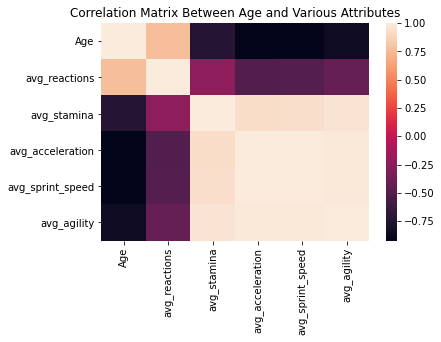

In [93]:
# lets use the average of the attributes and age and check correlation

query1 = pd.read_sql("""  SELECT age AS Age,AVG(reactions) AS avg_reactions,AVG(stamina) AS avg_stamina
                          ,AVG(acceleration) AS avg_acceleration,AVG(sprint_speed) AS avg_sprint_speed
                          ,AVG(agility) AS avg_agility
                          FROM attribute_imp
                          GROUP BY 1
                          ORDER BY 1""",con)
corr = query1.corr()
ax = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,)
ax.set_title("Correlation Matrix Between Age and Various Attributes")
# We can clearly see that Age has a strong negative correlation with average acceleration,average agility, average stamina and average sprint speed of the players whereas age shows a weak positive correlation with the average reactions of the players.

Text(0.5, 1.0, 'Overall vs Potential')

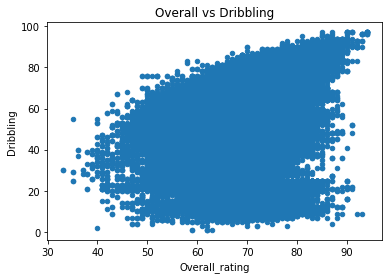

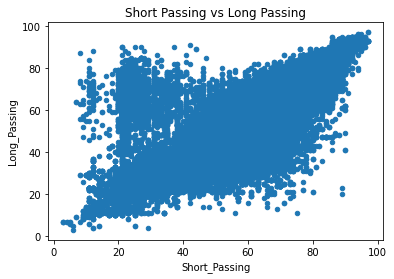

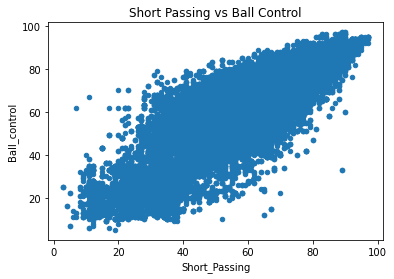

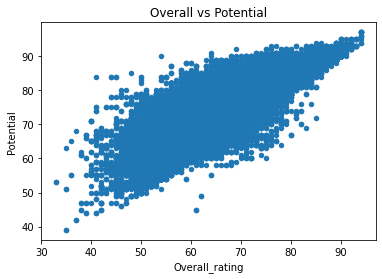

In [95]:
#
qu = pd.read_sql("""  SELECT overall_rating AS Overall_rating,potential AS Potential, dribbling AS Dribbling,
                        short_passing as Short_Passing, long_passing AS Long_Passing, ball_control AS Ball_control
                        FROM Player_Attributes
                        ORDER BY 1""",con)

ax = qu.plot(x="Overall_rating",y="Dribbling",kind="scatter")
ax.set_title("Overall vs Dribbling")

ax = qu.plot(x="Short_Passing",y="Long_Passing",kind="scatter")
ax.set_title("Short Passing vs Long Passing")

ax = qu.plot(x="Short_Passing",y="Ball_control",kind="scatter")
ax.set_title("Short Passing vs Ball Control")

ax = qu.plot(x="Overall_rating",y="Potential",kind="scatter")
ax.set_title("Overall vs Potential")
##In terms of prediction analysis later we might infer that ball control and short passing form a good fit.

Players with higher overall ratings are not always the players who can dribble well and this is true as several high rated players are defenders and goalkeepers whose strong suit is not dribbling.

#Surprisingly there are a lot of players who despite having high Long Passing scores have low Short Passing scores
#and this is a very interesting point


Correlation of Reactions with Age:  0.7675305570880387
Correlation of Stamina with Age:  -0.7260835589278937
Correlation of Acceleration with Age:  -0.9199811468752116
Correlation of Sprint Speed with Age:  -0.9104739545625228
Correlation of Agility with Age:  -0.849583392075151


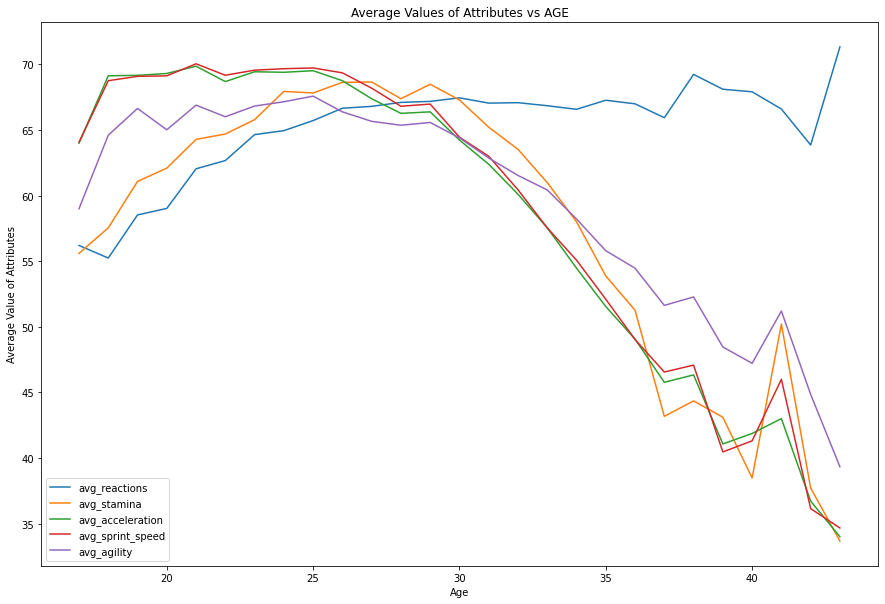

In [97]:
query1 = pd.read_sql("""  SELECT age AS Age,AVG(reactions) AS avg_reactions,AVG(stamina) AS avg_stamina
                          ,AVG(acceleration) AS avg_acceleration,AVG(sprint_speed) AS avg_sprint_speed
                          ,AVG(agility) AS avg_agility
                          FROM attribute_imp
                          GROUP BY 1
                          ORDER BY 1""",con)
ax = query1.plot(x="Age", y=["avg_reactions", "avg_stamina", "avg_acceleration","avg_sprint_speed","avg_agility"], kind="line",figsize=(15,10))

ax.set_ylabel("Average Value of Attributes")
ax.set_title("Average Values of Attributes vs AGE")
print("Correlation of Reactions with Age: ",query1['Age'].corr(query1['avg_reactions']))
print("Correlation of Stamina with Age: ",query1['Age'].corr(query1['avg_stamina']))
print("Correlation of Acceleration with Age: ",query1['Age'].corr(query1['avg_acceleration']))
print("Correlation of Sprint Speed with Age: ",query1['Age'].corr(query1['avg_sprint_speed']))
print("Correlation of Agility with Age: ",query1['Age'].corr(query1['avg_agility']))
# players get older the attributes which depend on the physical health of the player like Acceleration, Sprint Speed, 
# Agility and Stamina decreases but reactions increases somewhat 

name  HOME  AWAY
0  England Premier League  4715  3525
1          France Ligue 1  4265  3162
2   Germany 1. Bundesliga  3982  3121
3           Italy Serie A  4528  3367
4         Spain LIGA BBVA  4959  3453

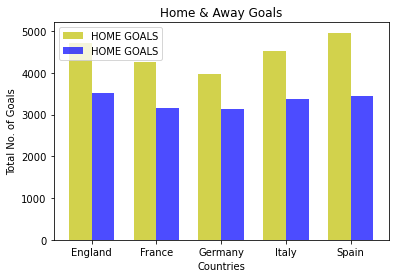

In [105]:
# play in home vs away
query = pd.read_sql("""SELECT name,SUM(home_team_goal) as HOME,SUM(away_team_goal) AS AWAY
                        FROM match_league
                        WHERE name IN ("France Ligue 1","England Premier League","Spain LIGA BBVA","Germany 1. Bundesliga","Italy Serie A")
                        GROUP BY 1""",con)

ind = np.arange(5)
width = 0.35

hm = plt.bar(ind, query['HOME'],width,color='y',alpha=0.7,label='HOME GOALS')
aw = plt.bar(ind+width, query['AWAY'],width,color='b',alpha=0.7,label='HOME GOALS')
plt.ylabel('Total No. of Goals')
plt.xlabel('Countries')
plt.title('Home & Away Goals')
locations = ind+width / 2
labels = ["England","France","Germany","Italy","Spain"]
plt.xticks(locations,labels)
plt.legend()
query


Average Unpredictability: 
 English Premier League     9.50000
France Ligue 1            11.40625
Germany 1. Bundesliga     10.50000
Italy Serie A              9.65625
Spain LIGA BBVA            9.78125
dtype: float64


English Premier League  France Ligue 1  Germany 1. Bundesliga  \
2008/2009                    7.75           11.50                  10.25   
2009/2010                    9.50           10.50                   9.75   
2010/2011                   11.75           11.25                  14.50   
2011/2012                    7.75           13.50                  10.25   
2012/2013                   13.00           13.25                   8.75   
2013/2014                    7.00            9.50                  10.75   
2014/2015                    8.75            8.25                  10.50   
2015/2016                   10.50           13.50                   9.25   

           Italy Serie A  Spain LIGA BBVA  
2008/2009           9.50            14.00  
2009/2010           9.25            10.50  
2010/2011          11.75            15.75  
2011/2012           8.50             8.00  
2012/2013           6.25             8.00  
2013/2014          10.75             7.50  
2014/2015          12.00             6.00  
2015/2016           9.25             8.50

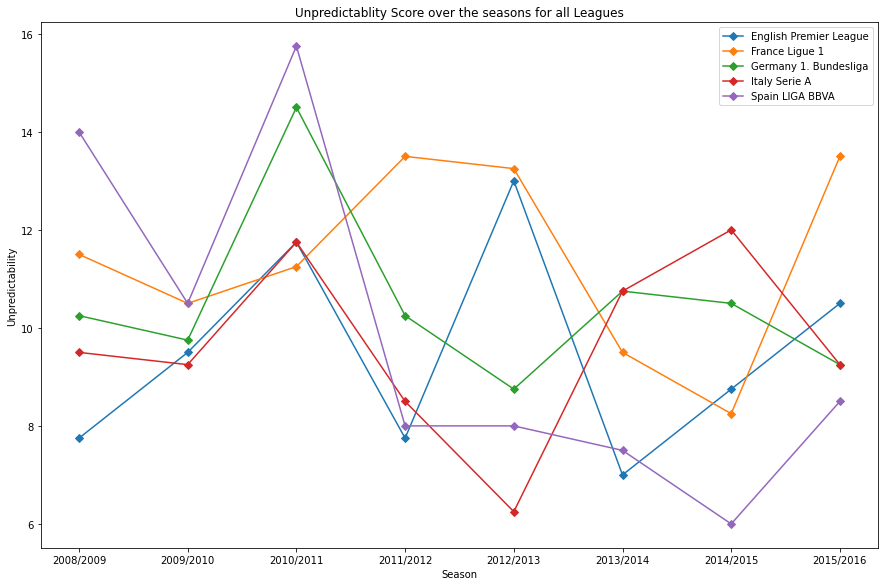

In [12]:
## league tables
query = pd.read_sql("""SELECT hd.name,hd.season,hd.draw1 AS Team_id,hd.dh+ad.da+3*wi.w AS Points
                       FROM home_draw hd
                       JOIN away_draw ad
                       ON hd.name = ad.name AND hd.season=ad.season AND hd.draw1=ad.draw2
                       JOIN winner_t wi
                       ON hd.name = wi.name AND hd.season=wi.season AND hd.draw1 = wi.winner
                       WHERE hd.name LIKE "England Premier League" OR hd.name LIKE "France Ligue 1" OR 
                       hd.name LIKE "Germany 1. Bundesliga" OR hd.name LIKE "Italy Serie A" OR
                       hd.name LIKE "Spain LIGA BBVA" 
                       ORDER BY 1,2,4 DESC;""",con)
query.to_sql("league_tables",con,if_exists="replace")

#Evaluating head-to-head scores to find the Unpredictability of each league
query = pd.read_sql("""SELECT * FROM league_tables;""",con)
lar = (query.groupby(['name','season'],group_keys=False)).apply(lambda x: x.nlargest(5,'Points'))

sma=(query.groupby(['name','season'],group_keys=False)).apply(lambda x: x.nsmallest(5,'Points'))

query1 = pd.read_sql("""SELECT * FROM match_league
                        WHERE name IN ("France Ligue 1","England Premier League","Spain LIGA BBVA","Germany 1. Bundesliga","Italy Serie A")
                        ORDER BY name,date;""",con)
l=0

c=[0]*40
ss = []
for k in range(0,200,5):
    for i in range(k,k+5):
        for j in range(k,k+5):
            sid = sma.iloc[i,3] #Team_id of one of the Bottom 5
            lid = lar.iloc[j,3] #Team_id of one of the Top 5
            s=sma.iloc[i,2]     #Season for which we are evaluating
            ss.append(s)
            #When bottom 5 teams plays the Top 5 teams at their home
            a = query1.loc[query1.home_team_api_id == sid] #Filtering by home team
            b = a.loc[(query1.away_team_api_id == lid)]    #Filtering by away team
            d = b.loc[(query1.season == s)]                #Filtering by season
           
            if((not d.empty)):
                if((d.iloc[0,11]==sid)):
                    c[l] = c[l] + 1
                elif((d.iloc[0,11]==999999)):
                    c[l] = c[l] + 0.5
                
            #When bottom 5 teams plays the Top 5 teams away
            a = query1.loc[query1.home_team_api_id == lid]
            b = a.loc[(query1.away_team_api_id == sid)]
            d = b.loc[(query1.season == s)]
            if((not d.empty)):
                if((d.iloc[0,11]==sid)):
                    c[l] = c[l] + 1.25
                elif((d.iloc[0,11]==999999)):
                    c[l] = c[l] + 0.5
            
            
    l=l+1
    
from collections import OrderedDict
a=list(OrderedDict.fromkeys(ss))
df = {'English Premier League':pd.Series(data=c[0:8],index=a),
      'France Ligue 1':pd.Series(data=c[8:16],index=a),
      'Germany 1. Bundesliga':pd.Series(data=c[16:24],index=a),
      'Italy Serie A':pd.Series(data=c[24:32],index=a),
      'Spain LIGA BBVA':pd.Series(data=c[32:40],index=a)}
df=pd.DataFrame(df)
ax = df.plot(figsize=(15,10),marker='D')
ax.set_xlabel("Season")
ax.set_ylabel("Unpredictability")
ax.set_title("Unpredictablity Score over the seasons for all Leagues")
x= [0, 1, 2, 3, 4, 5, 6, 7]
labels =['2008/2009','2009/2010','2010/2011','2011/2012','2012/2013','2013/2014','2014/2015','2015/2016']
plt.xticks(x,labels)
plt.subplots_adjust(bottom=0.15)
print("Average Unpredictability: \n",df.mean(axis=0))
df

#Ligue 1 seems most unpredictable i.e. a bottom 5 team gets a favourable outcome against a Top 5 team most often in this league.
#Germany has a general high unpredictableness but it may be due to the reason that I have considered the Top & Bottom 5 even though this league has only 18 teams each season
# 2010-11 in season in Bundesliga was strangre: Dortmund was champion, Bayern Munich came 3rd, Schalke, VfL Wolfsburg, Borussia Mönchengladbach, Eintracht Frankfurt were amongst the lowest ranked teams

In [4]:
# merge country and league data
countries_leagues = country_table.merge(league_table,left_on="id",right_on="id",how="outer")
countries_leagues = countries_leagues.drop("id",axis = 1)
countries_leagues = countries_leagues.rename(columns={'name_x':"country", 'name_y':"league"})

matches_new = match_table[['id', 'country_id', 'league_id', 'season', 'stage', 'date',
                   'match_api_id', 'home_team_api_id', 'away_team_api_id',
                    'home_team_goal', 'away_team_goal']]

matches_new = matches_new.drop("id",axis=1)

data = matches_new.merge(countries_leagues,left_on="country_id",right_on="country_id",how="outer")
#data.isnull().sum()
#data.nunique()

NameError: name 'country_table' is not defined

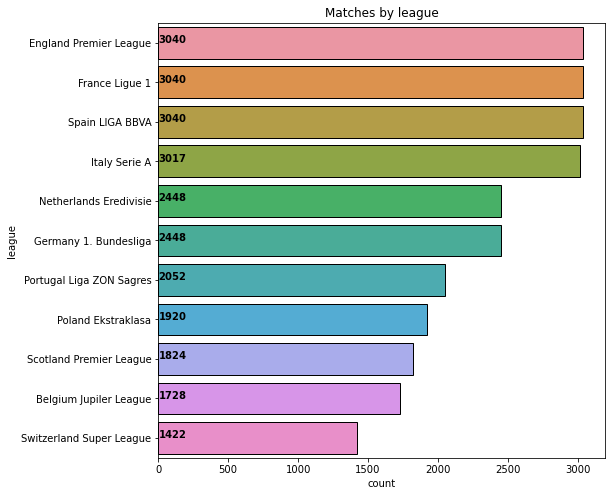

In [191]:
#number of matches in the different leagues
plt.figure(figsize=(8,8))
ax = sns.countplot(y = data["league"],
                   order=data["league"].value_counts().index,
                   linewidth = 1,
                   edgecolor = "k"*data["league"].nunique()
                 )
for i,j in enumerate(data["league"].value_counts().values):
    ax.text(.7,i,j,weight = "bold")
plt.title("Matches by league")
plt.show()

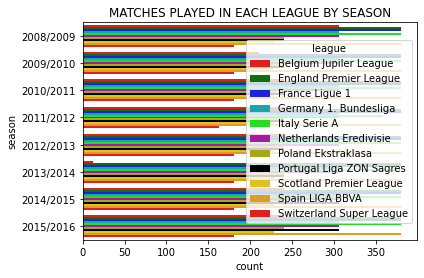

In [192]:
# matches in each league by season
sns.countplot(y = data["season"],hue=data["league"],
              palette=["r","g","b","c","lime","m","y","k","gold","orange"])
plt.title("MATCHES PLAYED IN EACH LEAGUE BY SEASON")
plt.show()

In [10]:
# merge with team data
data = data.merge(team_table,left_on="home_team_api_id",right_on="team_api_id",how="left")
data = data.drop(["id","team_api_id",'team_fifa_api_id'],axis = 1)
data = data.rename(columns={ 'team_long_name':"home_team_lname",'team_short_name':"home_team_sname"})



NameError: name 'data' is not defined

In [ ]:
# home vs away goals

plt.figure(figsize=(12,6))
sns.kdeplot(data["home_team_goal"],shade=True,
            color="b",label="home goals")
sns.kdeplot(data["away_team_goal"],shade=True,
            color="r",label="away goals")
plt.axvline(data["home_team_goal"].mean(),linestyle = "dashed",
            color="b",label="home goals mean")
plt.axvline(data["away_team_goal"].mean(),linestyle = "dashed",
            color="r",label="away goals mean")
plt.legend(loc="best",prop = {"size" : 12})
plt.title("DISTRIBUTION OF HOME AND AWAY GOALS")
plt.xlabel("goals")
plt.show()

In [ ]:
# goals each year

data["total_goal"] = data["home_team_goal"]+data["away_team_goal"]
a = data.groupby("season").agg({"total_goal":"sum"})
m = data.groupby("season").agg({"total_goal":"mean"})
s = data.groupby("season").agg({"total_goal":"std"})
x = data.groupby("season").agg({"total_goal":"max"})
xx = a.merge(m,left_index=True,right_index=True,how="left")
yy = s.merge(x,left_index=True,right_index=True,how="left")
x_y = xx.merge(yy,left_index=True,right_index=True,how="left").reset_index()
x_y = x_y.rename(columns={'total_goal_x_x':"goals", 'total_goal_y_x':"mean",
                          'total_goal_x_y':"std",'total_goal_y_y':"max"})
import itertools
cols = [ 'goals', 'mean', 'std', 'max' ]
length = len(cols)
cs   = ["r","g","b","c"] 
plt.figure(figsize=(12,16))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(length,length/length,j+1)
    sns.pointplot(x_y["season"],x_y[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace =.3)

In [8]:
###  outcomes of games
##create new feature for winning team
def label(data):
    if data["home_team_goal"] > data["away_team_goal"]:
        return data["home_team_lname"]
    elif data["away_team_goal"] > data["home_team_goal"]:
        return data["away_team_lname"]
    elif data["home_team_goal"] == data["away_team_goal"]:
        return "DRAW"
data["win"] = data.apply(lambda data:label(data),axis=1)

#create new feature for outcome of match
def lab(data):
    if data["home_team_goal"] > data["away_team_goal"]:
        return "HOME TEAM WIN"
    elif data["away_team_goal"] > data["home_team_goal"]:
        return "AWAY TEAM WIN"
    elif data["home_team_goal"] == data["away_team_goal"]:
        return "DRAW"
data["outcome_side"] = data.apply(lambda data:lab(data),axis = 1)

#create new feature for losing team
def labe(data):
    if data["home_team_goal"] < data["away_team_goal"]:
        return data["home_team_lname"]
    elif data["away_team_goal"] < data["home_team_goal"]:
        return data["away_team_lname"]
    elif data["home_team_goal"] == data["away_team_goal"]:
        return "DRAW"
    
data["lost"] = data.apply(lambda data:labe(data),axis=1)

plt.figure(figsize=(8,8))
data["outcome_side"].value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("rainbow",3),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.title("PROPORTION OF GAME OUTCOMES")
plt.show()


NameError: name 'data' is not defined